Descompactamento da base de dados e salvando ela na pasta custom_data

In [ ]:
# data.zip seria a pasta que obtemos quando exportamos os arquivos do label-studio
!unzip -q /content/data.zip -d custom_data

Necessário instalar o ultralytics para importação do modelo

In [ ]:
#!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Função para criar o arquivo de configuração data.yaml

In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Verifica se o arquivo que contém as classes existe, caso não exista é informado e cancela o resto da função
  if not os.path.exists(path_to_classes_txt):
    print(f'Arquivo não encontrado')
    return
  # Percorre o arquivo e salva as classes
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Cria um dicionário com as informações
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Escreve em um arquivo .yaml
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

  return

# Caminhos para os arquivos
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 18
names:
- abidor
- alaxan
- bactidol
- baristar
- bioflu
- biogesic
- cimegripe
- citoneurin
- dayzinc
- decolgen
- doralgina
- fishoil
- kremils
- medicol
- neolefrin
- neozep
- neutrofer
- varicell


In [ ]:
# Treina com 60 epócas
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 61.1MB/s]
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=Fa

In [ ]:
# Faz a predição em imagens de validação e salva
!yolo detect predict model=/content/runs/detect/train/weights/best.pt source=/content/data/validation/images save=True

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,419,766 parameters, 0 gradients, 21.3 GFLOPs

image 1/263 /content/data/validation/images/01a4b603-00000289_decolgen.jpg: 640x640 2 decolgens, 15.7ms
image 2/263 /content/data/validation/images/01c4a476-00000028.jpg: 640x640 3 cimegripes, 15.7ms
image 3/263 /content/data/validation/images/04b78f6a-00000208_bactidol.jpg: 640x640 1 bactidol, 15.6ms
image 4/263 /content/data/validation/images/0516c390-00000048.jpg: 640x640 3 varicells, 15.6ms
image 5/263 /content/data/validation/images/05946db2-00000120.jpg: 640x640 1 neolefrin, 15.6ms
image 6/263 /content/data/validation/images/05b5225f-00000005_bactidol.jpg: 640x640 1 bactidol, 15.6ms
image 7/263 /content/data/validation/images/05c4b8e5-00000026_biogesic.jpg: 640x640 2 biogesics, 15.0ms
image 8/263 /content/data/validation/images/05ef7d70-00000066.jpg: 640x640 1 doralgina, 15.0ms
image 9/263 /content/data/validation/i

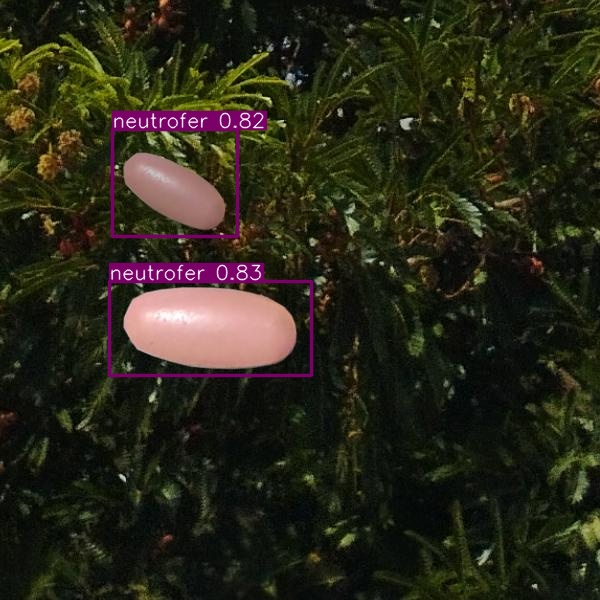

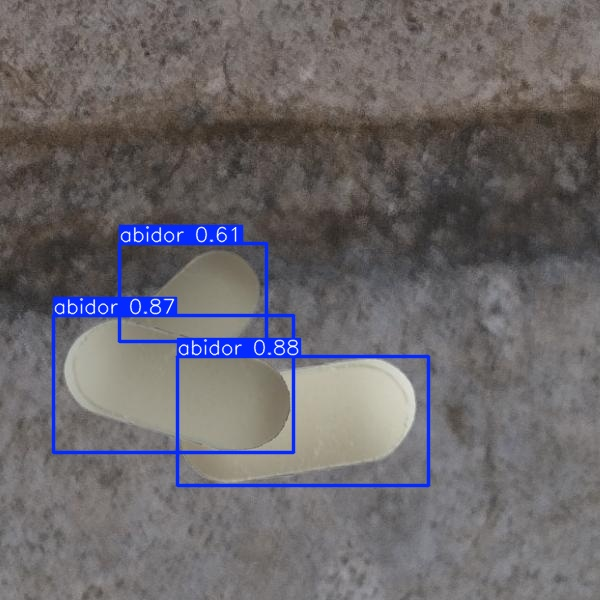

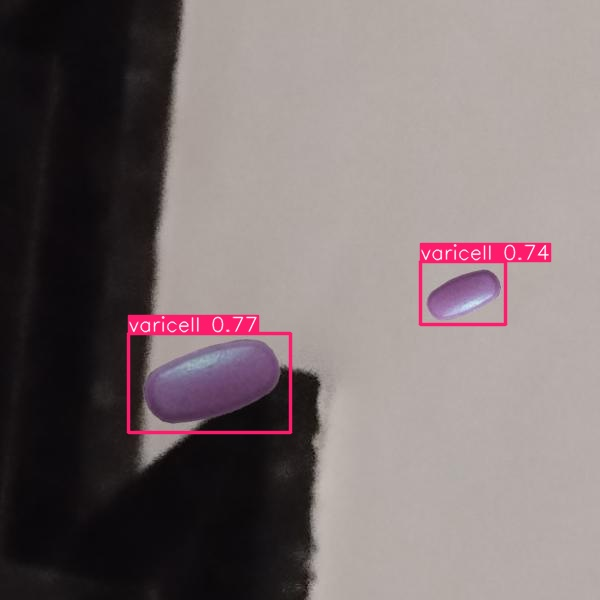

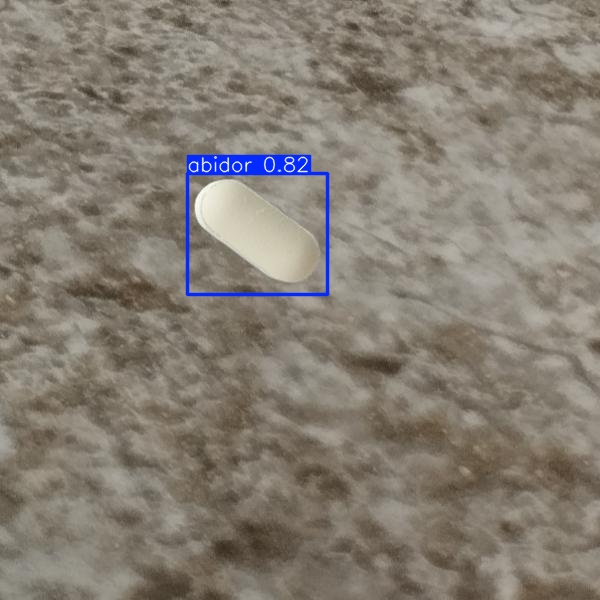

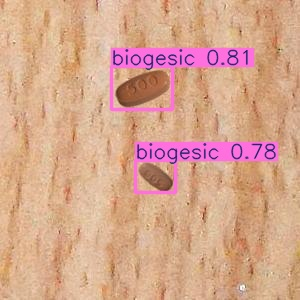

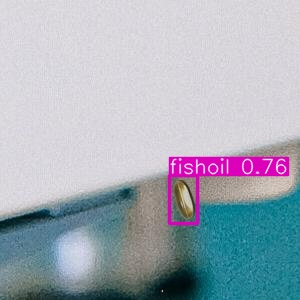

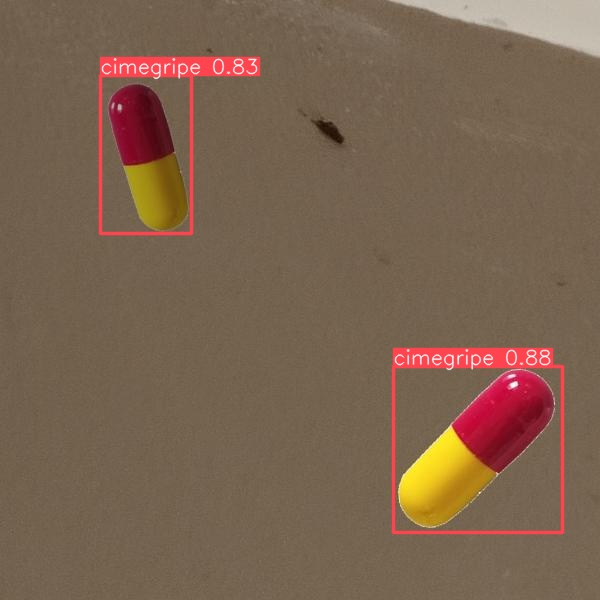

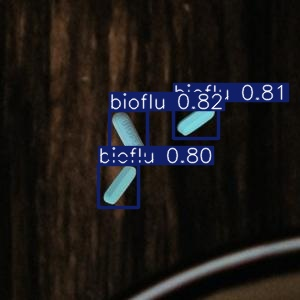

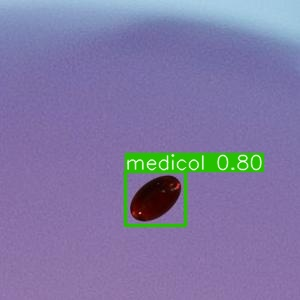

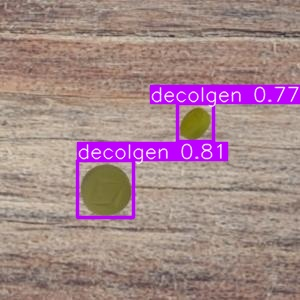

In [ ]:
import glob
from IPython.display import Image, display
# Mostra as dez primeiras imagens
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [ ]:
# Salva o modelo e os arquivos de treino
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Compacta os arquivos
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

mkdir: cannot create directory ‘/content/my_model’: File exists
/content/my_model
updating: my_model.pt (deflated 8%)
updating: train/ (stored 0%)
updating: train/events.out.tfevents.1741327302.27961542fef8.2006.0 (deflated 91%)
updating: train/confusion_matrix.png (deflated 20%)
updating: train/val_batch1_labels.jpg (deflated 9%)
updating: train/val_batch0_labels.jpg (deflated 7%)
updating: train/weights/ (stored 0%)
updating: train/weights/best.pt (deflated 8%)
updating: train/weights/last.pt (deflated 8%)
updating: train/train_batch2.jpg (deflated 3%)
updating: train/train_batch7400.jpg (deflated 7%)
updating: train/args.yaml (deflated 53%)
updating: train/results.png (deflated 7%)
updating: train/confusion_matrix_normalized.png (deflated 17%)
updating: train/train_batch0.jpg (deflated 2%)
updating: train/labels_correlogram.jpg (deflated 37%)
updating: train/labels.jpg (deflated 25%)
updating: train/val_batch1_pred.jpg (deflated 9%)
updating: train/PR_curve.png (deflated 14%)
updati